In [54]:
pip freeze > model_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#data_train_df = pd.read_csv("data_train_csv")

#data_train_df = pd.read_csv("data_train_smote_auto_csv")

data_train_df = pd.read_csv("data_train_smotemin_csv")

data_test_df = pd.read_csv("data_test_nosmote_csv")

In [57]:
data_train_df

,Unnamed: 0,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder,Winner_num
0,0,3,16,2.000000,24,4.79,29.31,179,29.500000,1
1,1,3,16,2.000000,24,4.79,29.31,178,29.400000,1
2,2,3,16,2.000000,24,4.79,29.31,176,29.200000,1
3,3,3,16,2.000000,24,4.79,29.31,175,29.100000,1
4,4,3,16,2.000000,24,4.79,29.31,173,28.500000,1
...,...,...,...,...,...,...,...,...,...,...
323253,323253,2,19,2.111111,24,5.07,31.45,152,25.295248,2
323254,323254,3,17,2.125000,25,5.01,32.44,100,16.437651,2
323255,323255,6,9,1.800000,24,5.01,31.44,21,3.338931,2
323256,323256,5,10,1.666667,22,4.19,22.99,70,11.401138,2


In [58]:
data_train_df = data_train_df.drop(['Unnamed: 0'], axis=1)
data_test_df = data_test_df.drop(['Unnamed: 0'], axis=1)

In [59]:
y_train = data_train_df['Winner_num']
X_train = data_train_df.drop('Winner_num',axis=1)
X_test = data_test_df.drop('Winner_num',axis=1) 
y_test = data_test_df['Winner_num']

In [60]:
data_train_df

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder,Winner_num
0,3,16,2.000000,24,4.79,29.31,179,29.500000,1
1,3,16,2.000000,24,4.79,29.31,178,29.400000,1
2,3,16,2.000000,24,4.79,29.31,176,29.200000,1
3,3,16,2.000000,24,4.79,29.31,175,29.100000,1
4,3,16,2.000000,24,4.79,29.31,173,28.500000,1
...,...,...,...,...,...,...,...,...,...
323253,2,19,2.111111,24,5.07,31.45,152,25.295248,2
323254,3,17,2.125000,25,5.01,32.44,100,16.437651,2
323255,6,9,1.800000,24,5.01,31.44,21,3.338931,2
323256,5,10,1.666667,22,4.19,22.99,70,11.401138,2


Random Forest model

In [61]:
X_train

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder
0,3,16,2.000000,24,4.79,29.31,179,29.500000
1,3,16,2.000000,24,4.79,29.31,178,29.400000
2,3,16,2.000000,24,4.79,29.31,176,29.200000
3,3,16,2.000000,24,4.79,29.31,175,29.100000
4,3,16,2.000000,24,4.79,29.31,173,28.500000
...,...,...,...,...,...,...,...,...
323253,2,19,2.111111,24,5.07,31.45,152,25.295248
323254,3,17,2.125000,25,5.01,32.44,100,16.437651
323255,6,9,1.800000,24,5.01,31.44,21,3.338931
323256,5,10,1.666667,22,4.19,22.99,70,11.401138


In [62]:
X_test

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Remaining overs and balls,Remainder
0,3,16,2.000000,24,4.79,29.31,177,29.3
1,3,16,2.000000,24,4.79,29.31,174,29.0
2,3,16,2.000000,24,4.79,29.31,167,27.5
3,3,16,2.000000,24,4.79,29.31,163,27.1
4,3,16,2.000000,24,4.79,29.31,156,26.0
...,...,...,...,...,...,...,...,...
54040,2,16,1.777778,21,5.40,31.64,38,6.2
54041,2,16,1.777778,21,5.40,31.64,36,6.0
54042,3,13,1.625000,21,5.40,31.64,29,4.5
54043,3,13,1.625000,21,5.40,31.64,19,3.1


Train the baseline RF classifier

In [63]:
rnd_clf = RandomForestClassifier(random_state=7)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [64]:
rnd_clf_train_score = rnd_clf.score(X_train, y_train)
rnd_clf_test_score = rnd_clf.score(X_test, y_test)
print("Training score:", rnd_clf_train_score)
print("Testing score:", rnd_clf_test_score)

Training score: 0.9780144652259186
Testing score: 0.9309279304283468


In [65]:
y_pred_rf = rnd_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf.classes_)
cm_norm = confusion_matrix(y_test, y_pred_rf, labels=rnd_clf.classes_, normalize='true')
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['1', '2', '3'])

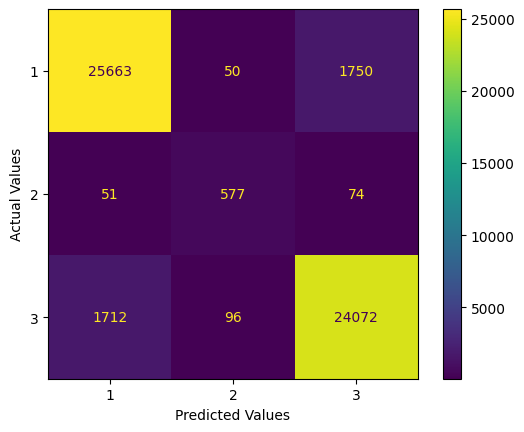

In [66]:
cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

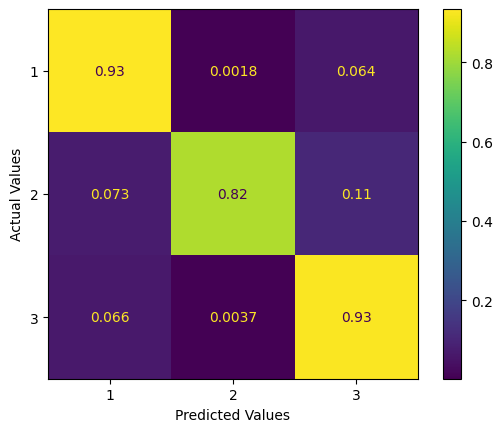

In [67]:
cmd_norm = ConfusionMatrixDisplay(confusion_matrix = cm_norm, display_labels=['1', '2', '3'])
cmd_norm.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [68]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.94      0.93      0.94     27463
           2       0.80      0.82      0.81       702
           3       0.93      0.93      0.93     25880

    accuracy                           0.93     54045
   macro avg       0.89      0.90      0.89     54045
weighted avg       0.93      0.93      0.93     54045



Tune the RF model

Difference between the original model and below - is it max_depth?

In [69]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split

param_dist = {'max_depth': randint(1,20),
              #guessing at min sample split
              'min_samples_split': randint(2,10),
              #'max_leaf_nodes': randint(),
              #guess for min samples leaf
              'min_samples_leaf': randint(1,500),
              'n_estimators': randint(50,500),
              #'max_sample': randint(),
              'max_features': randint(1,8)
              }

# Create a random forest classifier
rf = RandomForestClassifier(random_state=7)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=8, 
                                 cv=5, random_state=7)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=7),
                   n_iter=8,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019D80D53A60>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DC7A7B370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DC7A5B430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DC7A7B1C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019DC7A7BAC0>},
                   random_state=7)

In [70]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'max_features': 4, 'min_samples_leaf': 190, 'min_samples_split': 2, 'n_estimators': 340}


In [71]:
sdfhjk

NameError: name 'sdfhjk' is not defined

Use the tuned hyperparameters for a new RF

In [72]:
rnd_clf_tweaked = RandomForestClassifier(n_estimators=340, max_depth=17, min_samples_split=2, min_samples_leaf=190, max_features=4, 
                                 n_jobs=-1, random_state=7)
rnd_clf_tweaked.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, max_features=4, min_samples_leaf=190,
                       n_estimators=340, n_jobs=-1, random_state=7)

In [73]:
rnd_clf_tweaked_train_score = rnd_clf_tweaked.score(X_train, y_train)
rnd_clf_tweaked_test_score = rnd_clf_tweaked.score(X_test, y_test)
print("Training score:", rnd_clf_tweaked_train_score)
print("Testing score:", rnd_clf_tweaked_test_score )

Training score: 0.8637063893236981
Testing score: 0.8003330557868443


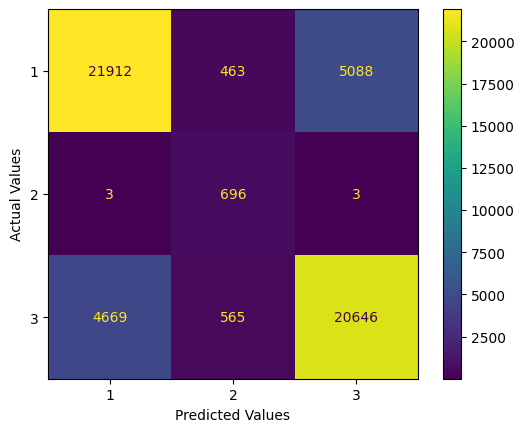

In [74]:
y_tweaked_pred_rf = rnd_clf_tweaked.predict(X_test)

cm = confusion_matrix(y_test, y_tweaked_pred_rf, labels=rnd_clf_tweaked.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['1', '2', '3'])
cmd.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

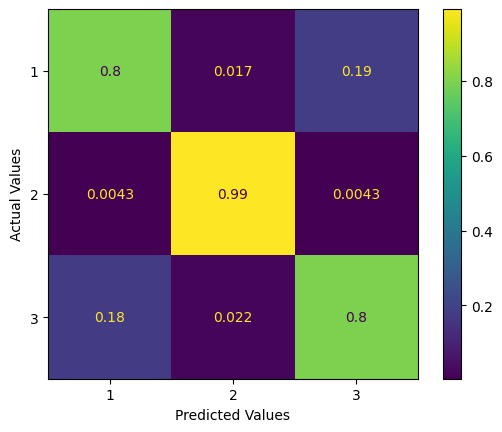

              precision    recall  f1-score   support

           1       0.94      0.93      0.94     27463
           2       0.80      0.82      0.81       702
           3       0.93      0.93      0.93     25880

    accuracy                           0.93     54045
   macro avg       0.89      0.90      0.89     54045
weighted avg       0.93      0.93      0.93     54045



In [75]:
cm_norm = confusion_matrix(y_test, y_tweaked_pred_rf, labels=rnd_clf_tweaked.classes_, normalize='true')
cmd_norm = ConfusionMatrixDisplay(confusion_matrix = cm_norm, display_labels=['1', '2', '3'])
cmd_norm.plot()
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print(classification_report(y_test, y_pred_rf))

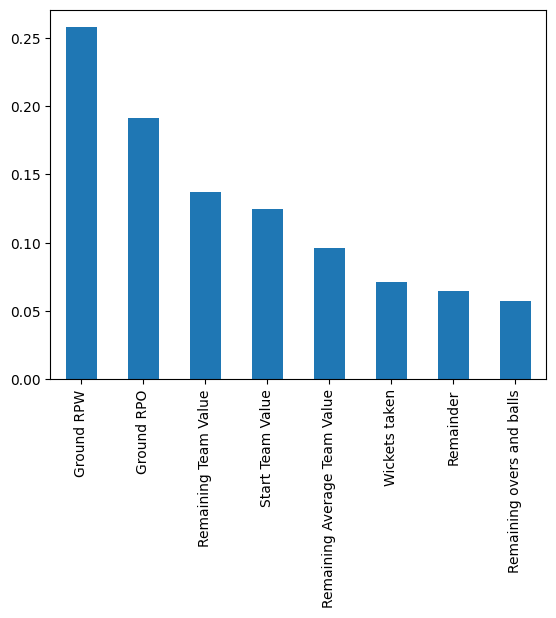

In [76]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

https://www.datacamp.com/tutorial/random-forests-classifier-python

LDA

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

explained_variance = lda.explained_variance_ratio_

print(explained_variance)

[0.64748659 0.35251341]


In [78]:
n_component_1 = 0.64748659
n_component_2 = 0.35251341
percentage_of_variance_explained = n_component_1 + n_component_2
print("Percentage of variance explained = " + str(percentage_of_variance_explained*100))

Percentage of variance explained = 100.0


In [79]:
classifier_lda = RandomForestClassifier(n_estimators=465, max_depth=17, min_samples_split=7, min_samples_leaf=123, max_features=2, 
                                 n_jobs=-1, random_state=7)

classifier_lda.fit(X_train_lda, y_train)
y_pred_lda = classifier_lda.predict(X_test_lda)

print('Confusion matrix : \n' + str(confusion_matrix(y_test, y_pred_lda)))
print('Accuracy score : \n' + str(accuracy_score(y_test, y_pred_lda)))

Confusion matrix : 
[[15634  5918  5911]
 [  172   303   227]
 [ 4512  5624 15744]]
Accuracy score : 
0.5861966879452308


https://www.datacamp.com/tutorial/random-forests-classifier-python